Looking for cross basin tilt along different wind scenerios.

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import (nc_tools, viz_tools, gsw_calls)
import numpy.ma as ma
from matplotlib import animation, rc
from scipy.optimize import curve_fit
from visualisations import *
%matplotlib inline

In [2]:
rc('animation', html='html5')

In [4]:
def calc_rho(Sal, TempC, P):
    sqrSal = np.sqrt(Sal)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    return rho
def func(x,m,b):
    return m*x + b

In [5]:
lake_meshmask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/lake_meshmask201702.nc')
U24W = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24UW/SalishSea_1h_20170101_20170105_grid_T.nc')
U24S = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US/SalishSea_1h_20160601_20160605_grid_T.nc')
U48W = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48UW/SalishSea_1h_20170101_20170105_grid_T.nc')
U48S = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US/SalishSea_1h_20160601_20160605_grid_T.nc')
U72W = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72UW/SalishSea_1h_20170101_20170105_grid_T.nc')
U72S = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US/SalishSea_1h_20160601_20160605_grid_T.nc')

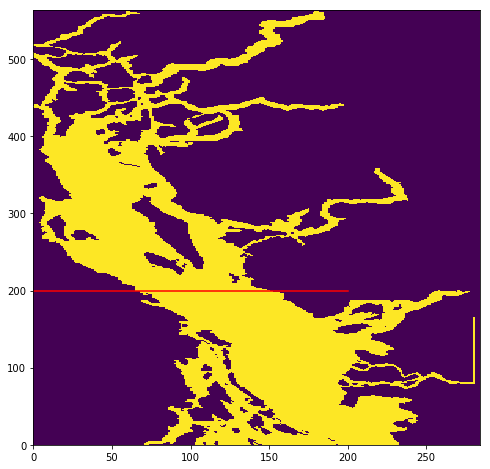

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pcolormesh(lake_meshmask.variables['tmask'][0,0,...])
ax.plot([0,200], [200,200], 'r-')

In [94]:
file2 = U24W
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])             

28.2299156189
11.509311676
0.204864947553


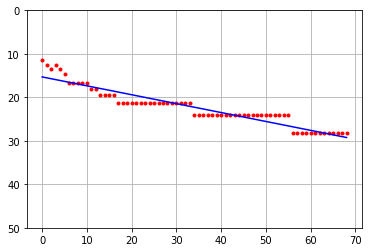

In [97]:
i = 30
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [34]:
file2 = U48W
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

28.2299156189
10.5047655106
0.213468427451


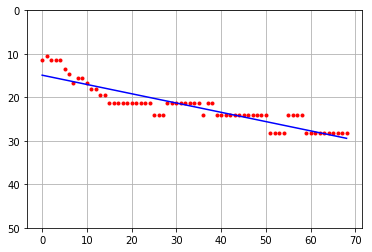

In [38]:
i = 24
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [39]:
file2 = U72W
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

28.2299156189
11.509311676
0.228863143153


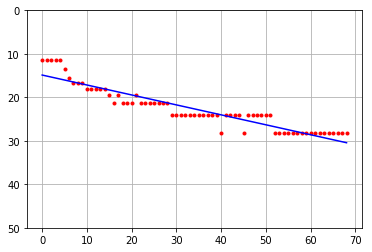

In [44]:
i = 17
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [45]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24UW0.1/SalishSea_1h_20170101_20170105_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

28.2299156189
7.50062322617
0.197451324029


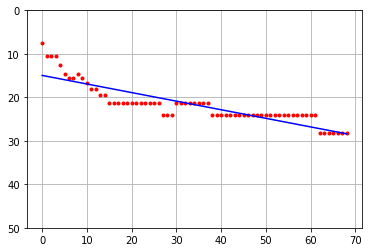

In [50]:
i = 47
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [51]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48UW0.1/SalishSea_1h_20170101_20170105_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

28.2299156189
6.50031042099
0.215303846287


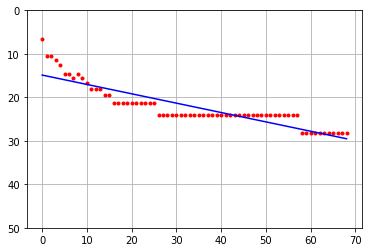

In [59]:
i = 40
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [60]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72UW0.1/SalishSea_1h_20170101_20170105_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

28.2299156189
7.50062322617
0.198712917308


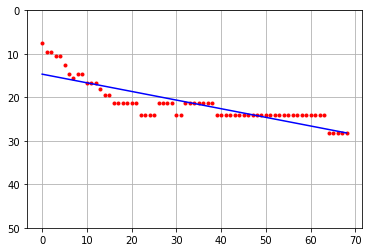

In [64]:
i = 34
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [65]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24UW0.3/SalishSea_1h_20170101_20170105_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

28.2299156189
11.509311676
0.213558681545


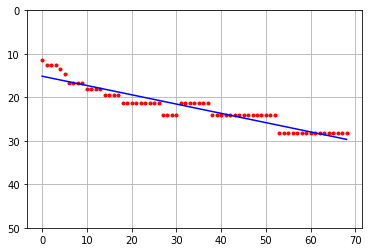

In [70]:
i = 26
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [71]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48UW0.3/SalishSea_1h_20170101_20170105_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

34.6857566833
12.5181665421
0.243318403763


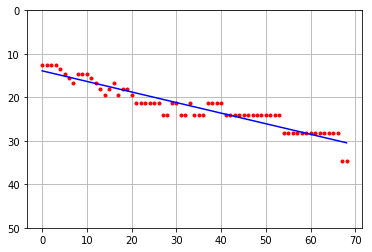

In [77]:
i = 20
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [78]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72UW0.3/SalishSea_1h_20170101_20170105_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

34.6857566833
10.5047655106
0.289675441743


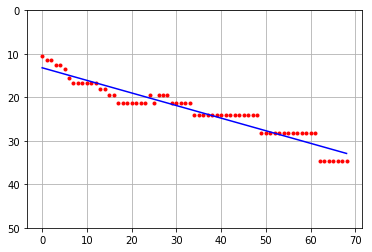

In [84]:
i = 15
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [98]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

15.6342878342
6.50031042099
0.0967518569326


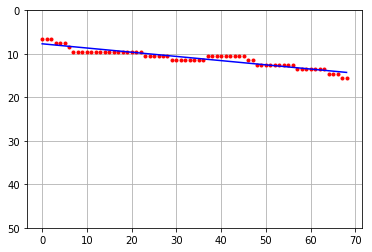

In [105]:
i = 25
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [106]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

15.6342878342
6.50031042099
0.11439483872


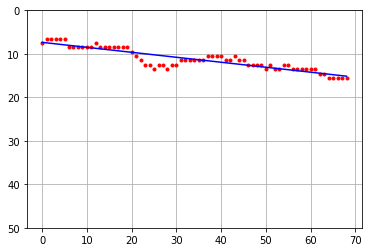

In [110]:
i = 19
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [158]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

14.5689821243
4.5000705719
0.0993047011578


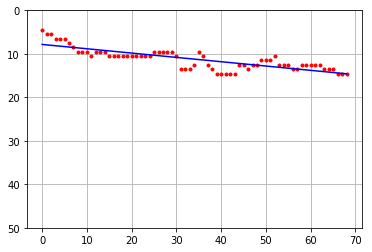

In [159]:
i = 12
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [120]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US0.1/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

14.5689821243
3.50003051758
0.106664186399


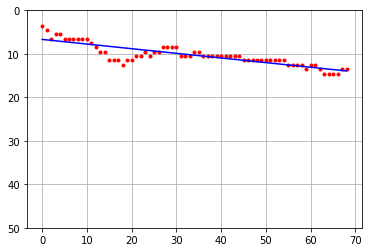

In [128]:
i = 32
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [160]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US0.1/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

12.5181665421
3.50003051758
0.0733817162875


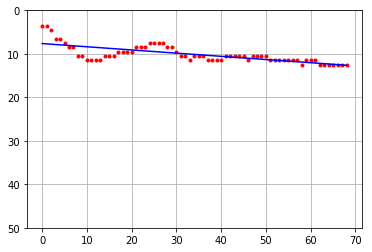

In [161]:
i = 23
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [135]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US0.1/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

14.5689821243
4.5000705719
0.114811523367


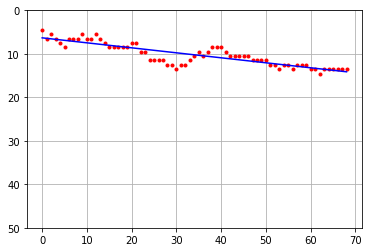

In [138]:
i = 17
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [139]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US0.3/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

15.6342878342
6.50031042099
0.0858465881976


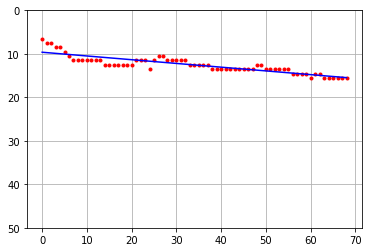

In [145]:
i = 23
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [146]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US0.3/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

18.0071353912
7.50062322617
0.112669013666


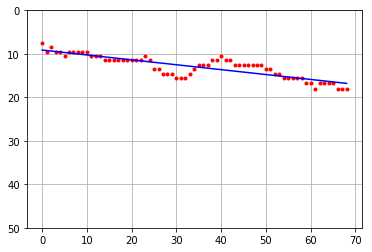

In [151]:
i = 17
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [152]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US0.3/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

19.4817848206
7.50062322617
0.121091605361


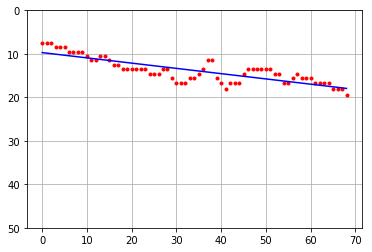

In [157]:
i = 11
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

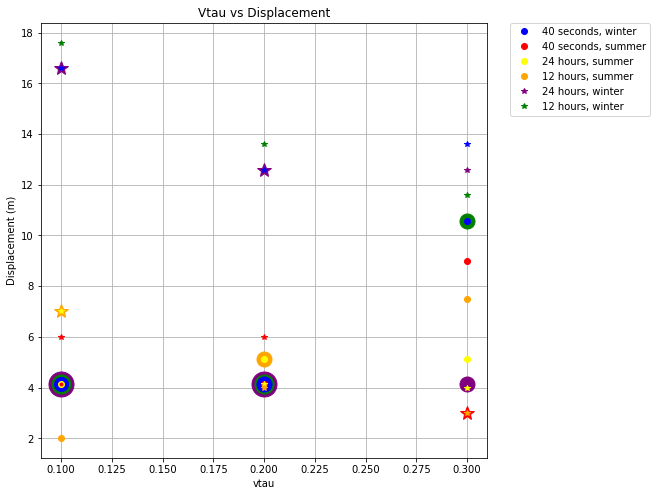

In [217]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_ylabel('Displacement (m)')
ax.set_xlabel('vtau')
ax.grid('on')
ax.plot(0.2,4.129659653,'o', color='purple', markersize = 25 )
ax.plot(0.2,4.129659653,'o', color='green', markersize = 19)
ax.plot(0.2,4.129659653,'o', color='blue', markersize = 15)
ax.plot(0.1,4.129659653,'o', color='purple', markersize = 25)
ax.plot(0.1,4.129659653,'o', color='green', markersize = 19)
ax.plot(0.1,4.129659653,'o', color='blue', markersize = 14)
ax.plot(0.3,4.129659653,'o', color='purple', markersize = 15)
ax.plot(0.3,10.58550072,'o', color='green', markersize = 15)
ax.plot(0.3,10.58550072,'o', color='blue', label = '40 seconds, winter')
ax.plot(0.2,5.129522324,'o', color='orange', markersize = 15 )
ax.plot(0.2,5.129522324,'o', color='yellow')
ax.plot(0.2,4.129659653,'o', color='red', label = '40 seconds, summer')
ax.plot(0.1,4.129659653,'o', color='yellow', label = '24 hours, summer')
ax.plot(0.1,2.013401032,'o', color='orange', label = '12 hours, summer')
ax.plot(0.1,4.129659653,'.', color='red')
ax.plot(0.3,5.129522324,'o', color='yellow')
ax.plot(0.3,7.502369881,'o', color='orange')
ax.plot(0.3,8.97701931,'o', color='red')
ax.plot(0.2,12.59094429,'*', color='purple', markersize = 15)
ax.plot(0.2,13.59549046,'*', color='green')
ax.plot(0.2,12.59094429,'*', color='blue')
ax.plot(0.1,16.59963274,'*', color='purple', markersize = 15)
ax.plot(0.1,17.59994555,'*', color='green')
ax.plot(0.1,16.59963274,'*', color='blue')
ax.plot(0.3,12.59094429,'*', color='purple', label = '24 hours, winter')
ax.plot(0.3,11.58208942,'*', color='green', label = '12 hours, winter')
ax.plot(0.3,13.59549046,'*', color='blue')
ax.plot(0.2,4.129659653,'*', color='yellow')
ax.plot(0.2,4.00445509,'*', color='orange')
ax.plot(0.2,6.004694939,'*', color='red')
ax.plot(0.1,7.004734993,'*', color='orange', markersize = 15)
ax.plot(0.1,7.004734993,'*', color='yellow')
ax.plot(0.1,6.004694939,'*', color='red')
ax.plot(0.3,4.00445509,'*', color='yellow')
ax.plot(0.3,3.004142284,'*', color='red', markersize=15)
ax.plot(0.3,3.004142284,'*', color='orange')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Vtau vs Displacement')

A plot of vtau vs displacement. The colours indicate the type of wind event (specifically the ramp up time), stars = max upward displacement, circles = max downward displacement, warm colours indicate summer stratification, cool colours show winter stratification.

Notes:
* tracking 1023.3. in winter and 1022 in summer
* upward displacement is generally more than downward (maybe because of chosen density to track?)

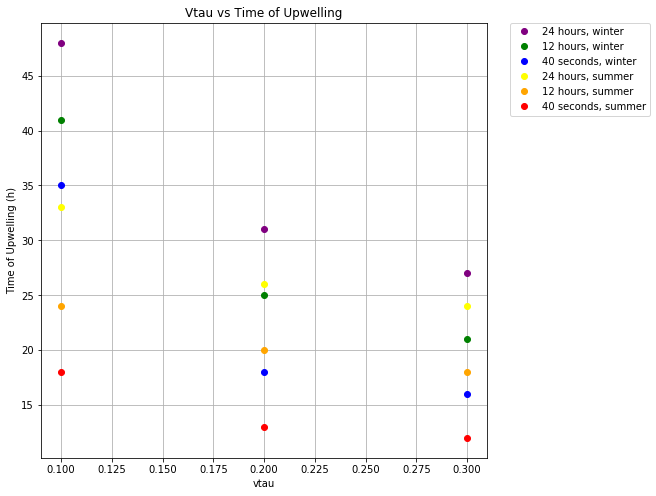

In [223]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_ylabel('Time of Upwelling (h)')
ax.set_xlabel('vtau')
ax.grid('on')
ax.plot(0.2,31,'o', color='purple' )
ax.plot(0.2,25,'o', color='green')
ax.plot(0.2,18,'o', color='blue')
ax.plot(0.1,48,'o', color='purple')
ax.plot(0.1,41,'o', color='green')
ax.plot(0.1,35,'o', color='blue')
ax.plot(0.3,27,'o', color='purple', label = '24 hours, winter')
ax.plot(0.3,21,'o', color='green', label = '12 hours, winter')
ax.plot(0.3,16,'o', color='blue', label = '40 seconds, winter')
ax.plot(0.2,26,'o', color='yellow' )
ax.plot(0.2,20,'o', color='orange')
ax.plot(0.2,13,'o', color='red')
ax.plot(0.1,33,'o', color='yellow', label = '24 hours, summer')
ax.plot(0.1,24,'o', color='orange', label = '12 hours, summer')
ax.plot(0.1,18,'o', color='red', label = '40 seconds, summer')
ax.plot(0.3,24,'o', color='yellow')
ax.plot(0.3,18,'o', color='orange')
ax.plot(0.3,12,'o', color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Vtau vs Time of Upwelling')

* 24 hours ramp up has longest time for each season
* 40 seconds has shortest
* could fit quadratic curve? not enough points...
* spacing between constant vtau seems pretty linear if we seperate by season 

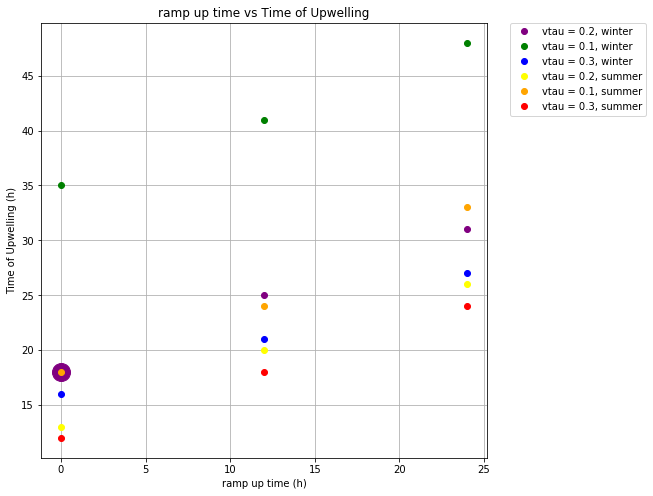

In [235]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_ylabel('Time of Upwelling (h)')
ax.set_xlabel('ramp up time (h)')
ax.grid('on')
ax.plot(24,31,'o', color='purple', label = 'vtau = 0.2, winter' )
ax.plot(12,25,'o', color='purple')
ax.plot(40/3600,18,'o', color='purple', markersize = 18)
ax.plot(24,48,'o', color='green', label = 'vtau = 0.1, winter')
ax.plot(12,41,'o', color='green')
ax.plot(4/360,35,'o', color='green')
ax.plot(24,27,'o', color='blue')
ax.plot(12,21,'o', color='blue')
ax.plot(4/360,16,'o', color='blue', label = 'vtau = 0.3, winter')
ax.plot(24,26,'o', color='yellow' , label = 'vtau = 0.2, summer')
ax.plot(12,20,'o', color='yellow')
ax.plot(4/360,13,'o', color='yellow')
ax.plot(24,33,'o', color='orange')
ax.plot(12,24,'o', color='orange')
ax.plot(4/360,18,'o', color='orange', label = 'vtau = 0.1, summer')
ax.plot(24,24,'o', color='red', label = 'vtau = 0.3, summer')
ax.plot(12,18,'o', color='red')
ax.plot(4/360,12,'o', color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('ramp up time vs Time of Upwelling')

* So. Linear.

In [276]:
from salishsea_tools import grid_tools

In [257]:
e3t_0 = lake_meshmask.variables['e3t_0']

In [395]:
U24W = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72UW0.3/SalishSea_1h_20170101_20170105_grid_T.nc')
t=53
ssh = U24W.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
den1 = calc_rho(U24W.variables['vosaline'][t,:,200,68], 
                U24W.variables['votemper'][t,:,200,68],
                U24W.variables['deptht'][:])
A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
den1 = calc_rho(U24W.variables['vosaline'][t,:,200,136], 
                U24W.variables['votemper'][t,:,200,136],
                U24W.variables['deptht'][:])
print(A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum())

222893.004147


In [396]:
a = np.array([225522.0146,
225500.8622,
225689.2462,
225743.8751,
225741.8879,
225715.2862,
225372.2134,
225338.683,
225269.177,
224942.7154,
224821.6334,
224972.7665,
225429.1101,
225258.0937,
224736.07,
224704.8263,
224469.4481,
224806.5727])

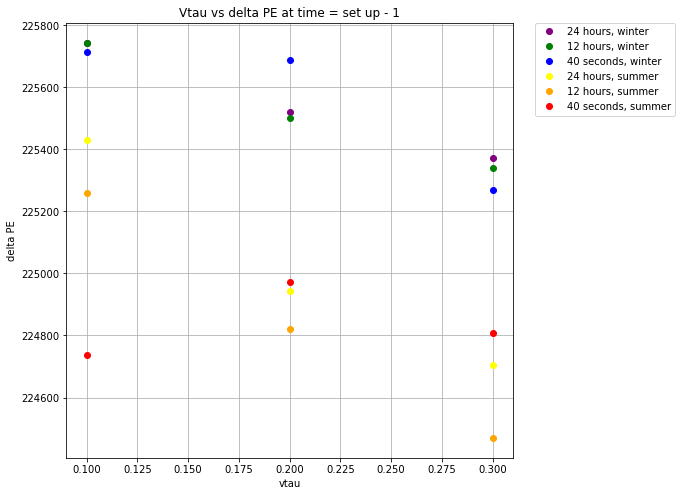

In [397]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_ylabel('delta PE')
ax.set_xlabel('vtau')
ax.grid('on')
ax.plot(0.2,a[0],'o', color='purple' )
ax.plot(0.2,a[1],'o', color='green')
ax.plot(0.2,a[2],'o', color='blue')
ax.plot(0.1,a[3],'o', color='purple')
ax.plot(0.1,a[4],'o', color='green')
ax.plot(0.1,a[5],'o', color='blue')
ax.plot(0.3,a[6],'o', color='purple', label = '24 hours, winter')
ax.plot(0.3,a[7],'o', color='green', label = '12 hours, winter')
ax.plot(0.3,a[8],'o', color='blue', label = '40 seconds, winter')
ax.plot(0.2,a[9],'o', color='yellow' )
ax.plot(0.2,a[10],'o', color='orange')
ax.plot(0.2,a[11],'o', color='red')
ax.plot(0.1,a[12],'o', color='yellow', label = '24 hours, summer')
ax.plot(0.1,a[13],'o', color='orange', label = '12 hours, summer')
ax.plot(0.1,a[14],'o', color='red', label = '40 seconds, summer')
ax.plot(0.3,a[15],'o', color='yellow')
ax.plot(0.3,a[16],'o', color='orange')
ax.plot(0.3,a[17],'o', color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Vtau vs delta PE at time = set up - 1')

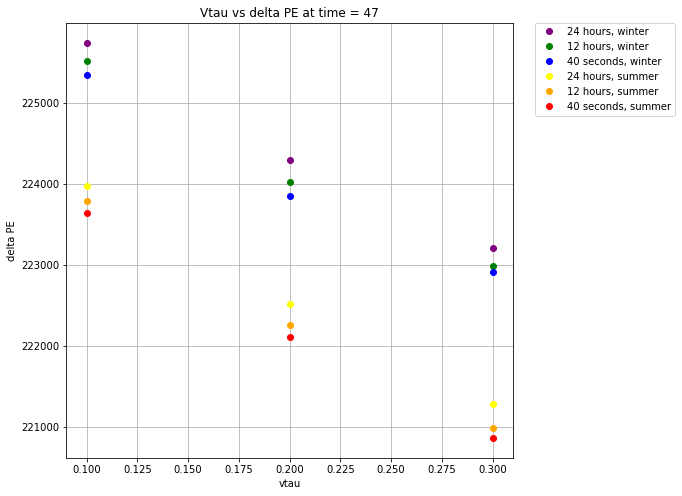

In [398]:
b=([224299.227,
224028.1897,
223853.4521,
225743.8751,
225520.7612,
225348.8909,
223215.3118,
222990.9758,
222916.4572,
222517.5889,
222264.2071,
222108.014,
223974.5521,
223787.6499,
223643.1389,
221289.3857,
220982.896,
220863.7496])

fig, ax = plt.subplots(figsize = (8,8))
ax.set_ylabel('delta PE')
ax.set_xlabel('vtau')
ax.grid('on')
ax.plot(0.2,b[0],'o', color='purple' )
ax.plot(0.2,b[1],'o', color='green')
ax.plot(0.2,b[2],'o', color='blue')
ax.plot(0.1,b[3],'o', color='purple')
ax.plot(0.1,b[4],'o', color='green')
ax.plot(0.1,b[5],'o', color='blue')
ax.plot(0.3,b[6],'o', color='purple', label = '24 hours, winter')
ax.plot(0.3,b[7],'o', color='green', label = '12 hours, winter')
ax.plot(0.3,b[8],'o', color='blue', label = '40 seconds, winter')
ax.plot(0.2,b[9],'o', color='yellow' )
ax.plot(0.2,b[10],'o', color='orange')
ax.plot(0.2,b[11],'o', color='red')
ax.plot(0.1,b[12],'o', color='yellow', label = '24 hours, summer')
ax.plot(0.1,b[13],'o', color='orange', label = '12 hours, summer')
ax.plot(0.1,b[14],'o', color='red', label = '40 seconds, summer')
ax.plot(0.3,b[15],'o', color='yellow')
ax.plot(0.3,b[16],'o', color='orange')
ax.plot(0.3,b[17],'o', color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Vtau vs delta PE at time = 47')

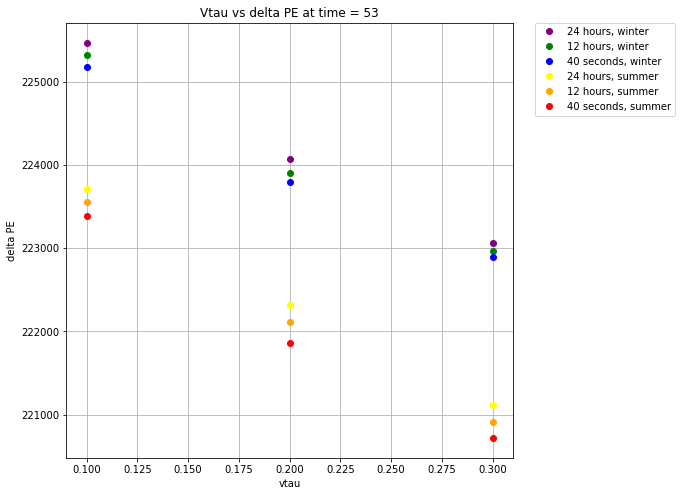

In [399]:
c = np.array([224068.1142,
223902.8055,
223792.8788,
225468.7472,
225315.2021,
225170.8361,
223058.5226,
222962.1262,
222893.0041,
222313.7705,
222109.604,
221866.0211,
223708.1778,
223551.8488,
223384.2918,
221115.8315,
220908.8443,
220718.9864])
fig, ax = plt.subplots(figsize = (8,8))
ax.set_ylabel('delta PE')
ax.set_xlabel('vtau')
ax.grid('on')
ax.plot(0.2,c[0],'o', color='purple' )
ax.plot(0.2,c[1],'o', color='green')
ax.plot(0.2,c[2],'o', color='blue')
ax.plot(0.1,c[3],'o', color='purple')
ax.plot(0.1,c[4],'o', color='green')
ax.plot(0.1,c[5],'o', color='blue')
ax.plot(0.3,c[6],'o', color='purple', label = '24 hours, winter')
ax.plot(0.3,c[7],'o', color='green', label = '12 hours, winter')
ax.plot(0.3,c[8],'o', color='blue', label = '40 seconds, winter')
ax.plot(0.2,c[9],'o', color='yellow' )
ax.plot(0.2,c[10],'o', color='orange')
ax.plot(0.2,c[11],'o', color='red')
ax.plot(0.1,c[12],'o', color='yellow', label = '24 hours, summer')
ax.plot(0.1,c[13],'o', color='orange', label = '12 hours, summer')
ax.plot(0.1,c[14],'o', color='red', label = '40 seconds, summer')
ax.plot(0.3,c[15],'o', color='yellow')
ax.plot(0.3,c[16],'o', color='orange')
ax.plot(0.3,c[17],'o', color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Vtau vs delta PE at time = 53')

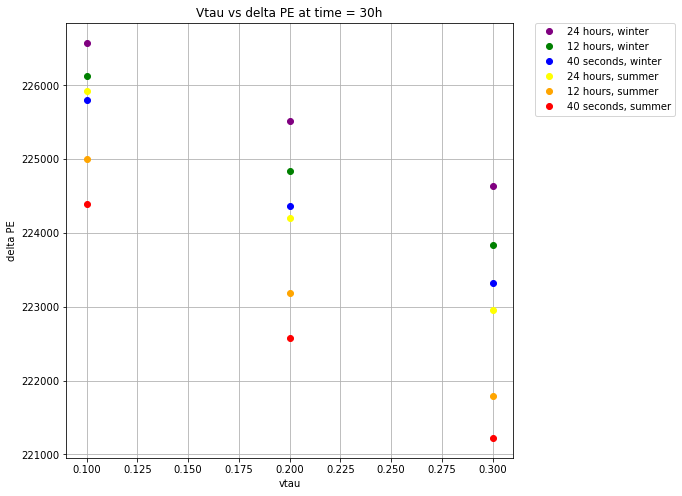

In [337]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_ylabel('delta PE')
ax.set_xlabel('vtau')
ax.grid('on')
ax.plot(0.2,225522.0146,'o', color='purple' )
ax.plot(0.2,224845.4879,'o', color='green')
ax.plot(0.2,224359.3601,'o', color='blue')
ax.plot(0.1,226577.6333,'o', color='purple')
ax.plot(0.1,226122.6376,'o', color='green')
ax.plot(0.1,225803.4395,'o', color='blue')
ax.plot(0.3,224637.2859,'o', color='purple', label = '24 hours, winter')
ax.plot(0.3,223840.4802,'o', color='green', label = '12 hours, winter')
ax.plot(0.3,223317.1638,'o', color='blue', label = '40 seconds, winter')
ax.plot(0.2,224202.8902,'o', color='yellow' )
ax.plot(0.2,223192.9619,'o', color='orange')
ax.plot(0.2,222580.9966,'o', color='red')
ax.plot(0.1,225925.6627,'o', color='yellow', label = '24 hours, summer')
ax.plot(0.1,225000.7925,'o', color='orange', label = '12 hours, summer')
ax.plot(0.1,224393.5779,'o', color='red', label = '40 seconds, summer')
ax.plot(0.3,222960.0706,'o', color='yellow')
ax.plot(0.3,221791.5272,'o', color='orange')
ax.plot(0.3,221221.6667,'o', color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Vtau vs delta PE at time = 30h')

In [400]:
U24W = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24UW/SalishSea_1h_20170101_20170105_grid_T.nc')
U48W = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48UW/SalishSea_1h_20170101_20170105_grid_T.nc')
U72W = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72UW/SalishSea_1h_20170101_20170105_grid_T.nc')
U24W1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24UW0.1/SalishSea_1h_20170101_20170105_grid_T.nc')
U48W1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48UW0.1/SalishSea_1h_20170101_20170105_grid_T.nc')
U72W1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72UW0.1/SalishSea_1h_20170101_20170105_grid_T.nc')
U24W3 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24UW0.3/SalishSea_1h_20170101_20170105_grid_T.nc')
U48W3 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48UW0.3/SalishSea_1h_20170101_20170105_grid_T.nc')
U72W3 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72UW0.3/SalishSea_1h_20170101_20170105_grid_T.nc')
U24S = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US/SalishSea_1h_20160601_20160605_grid_T.nc')
U48S = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US/SalishSea_1h_20160601_20160605_grid_T.nc')
U72S = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US/SalishSea_1h_20160601_20160605_grid_T.nc')
U24S1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US0.1/SalishSea_1h_20160601_20160605_grid_T.nc')
U48S1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US0.1/SalishSea_1h_20160601_20160605_grid_T.nc')
U72S1 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US0.1/SalishSea_1h_20160601_20160605_grid_T.nc')
U24S3 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US0.3/SalishSea_1h_20160601_20160605_grid_T.nc')
U48S3 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US0.3/SalishSea_1h_20160601_20160605_grid_T.nc')
U72S3 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US0.3/SalishSea_1h_20160601_20160605_grid_T.nc')
runs = [U24W,U48W,U72W, U24W1, U48W1, U72W1, U24W3, U48W3, U72W3,
       U24S, U48S, U72S,U24S1, U48S1, U72S1, U24S3, U48S3, U72S3 ]

In [401]:
ssh = U24W.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)

In [402]:
list_for_U24W = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U24W.variables['vosaline'][t,:,200,68], 
                U24W.variables['votemper'][t,:,200,68],
                U24W.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U24W.variables['vosaline'][t,:,200,136], 
                U24W.variables['votemper'][t,:,200,136],
                U24W.variables['deptht'][:])
    list_for_U24W[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [403]:
ssh = U48W.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)

In [404]:
list_for_U48W = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U48W.variables['vosaline'][t,:,200,68], 
                U48W.variables['votemper'][t,:,200,68],
                U48W.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U48W.variables['vosaline'][t,:,200,136], 
                U48W.variables['votemper'][t,:,200,136],
                U48W.variables['deptht'][:])
    list_for_U48W[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [405]:
ssh = U72W.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U72W = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U72W.variables['vosaline'][t,:,200,68], 
                U72W.variables['votemper'][t,:,200,68],
                U72W.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U72W.variables['vosaline'][t,:,200,136], 
                U72W.variables['votemper'][t,:,200,136],
                U72W.variables['deptht'][:])
    list_for_U72W[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [406]:
ssh = U24W1.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U24W1 = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U24W1.variables['vosaline'][t,:,200,68], 
                U24W1.variables['votemper'][t,:,200,68],
                U24W1.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U24W1.variables['vosaline'][t,:,200,136], 
                U24W1.variables['votemper'][t,:,200,136],
                U24W1.variables['deptht'][:])
    list_for_U24W1[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [407]:
ssh = U24W3.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U24W3 = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U24W3.variables['vosaline'][t,:,200,68], 
                U24W3.variables['votemper'][t,:,200,68],
                U24W3.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U24W3.variables['vosaline'][t,:,200,136], 
                U24W3.variables['votemper'][t,:,200,136],
                U24W3.variables['deptht'][:])
    list_for_U24W3[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [408]:
ssh = U48W1.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U48W1 = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U48W1.variables['vosaline'][t,:,200,68], 
                U48W1.variables['votemper'][t,:,200,68],
                U48W1.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U48W1.variables['vosaline'][t,:,200,136], 
                U48W1.variables['votemper'][t,:,200,136],
                U48W1.variables['deptht'][:])
    list_for_U48W1[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [409]:
ssh = U48W3.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U48W3 = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U48W3.variables['vosaline'][t,:,200,68], 
                U48W3.variables['votemper'][t,:,200,68],
                U48W3.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U48W3.variables['vosaline'][t,:,200,136], 
                U48W3.variables['votemper'][t,:,200,136],
                U48W3.variables['deptht'][:])
    list_for_U48W3[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [410]:
ssh = U72W3.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U72W3 = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U72W3.variables['vosaline'][t,:,200,68], 
                U72W3.variables['votemper'][t,:,200,68],
                U72W3.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U72W3.variables['vosaline'][t,:,200,136], 
                U72W3.variables['votemper'][t,:,200,136],
                U72W3.variables['deptht'][:])
    list_for_U72W3[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [411]:
ssh = U72W1.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U72W1 = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U72W1.variables['vosaline'][t,:,200,68], 
                U72W1.variables['votemper'][t,:,200,68],
                U72W1.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U72W1.variables['vosaline'][t,:,200,136], 
                U72W1.variables['votemper'][t,:,200,136],
                U72W1.variables['deptht'][:])
    list_for_U72W1[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [412]:
ssh = U72S1.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U72S1 = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U72S1.variables['vosaline'][t,:,200,68], 
                U72S1.variables['votemper'][t,:,200,68],
                U72S1.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U72S1.variables['vosaline'][t,:,200,136], 
                U72S1.variables['votemper'][t,:,200,136],
                U72S1.variables['deptht'][:])
    list_for_U72S1[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [413]:
ssh = U72S3.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U72S3 = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U72S3.variables['vosaline'][t,:,200,68], 
                U72S3.variables['votemper'][t,:,200,68],
                U72S3.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U72S3.variables['vosaline'][t,:,200,136], 
                U72S3.variables['votemper'][t,:,200,136],
                U72S3.variables['deptht'][:])
    list_for_U72S3[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [414]:
ssh = U72S.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U72S = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U72S.variables['vosaline'][t,:,200,68], 
                U72S.variables['votemper'][t,:,200,68],
                U72S.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U72S.variables['vosaline'][t,:,200,136], 
                U72S.variables['votemper'][t,:,200,136],
                U72S.variables['deptht'][:])
    list_for_U72S[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [415]:
ssh = U48S3.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U48S3 = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U48S3.variables['vosaline'][t,:,200,68], 
                U48S3.variables['votemper'][t,:,200,68],
                U48S3.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U48S3.variables['vosaline'][t,:,200,136], 
                U48S3.variables['votemper'][t,:,200,136],
                U48S3.variables['deptht'][:])
    list_for_U48S3[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [416]:
ssh = U48S1.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U48S1 = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U48S1.variables['vosaline'][t,:,200,68], 
                U48S1.variables['votemper'][t,:,200,68],
                U48S1.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U48S1.variables['vosaline'][t,:,200,136], 
                U48S1.variables['votemper'][t,:,200,136],
                U48S1.variables['deptht'][:])
    list_for_U48S1[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [417]:
ssh = U48S.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U48S = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U48S.variables['vosaline'][t,:,200,68], 
                U48S.variables['votemper'][t,:,200,68],
                U48S.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U48S.variables['vosaline'][t,:,200,136], 
                U48S.variables['votemper'][t,:,200,136],
                U48S.variables['deptht'][:])
    list_for_U48S[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [418]:
ssh = U24S.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U24S = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U24S.variables['vosaline'][t,:,200,68], 
                U24S.variables['votemper'][t,:,200,68],
                U24S.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U24S.variables['vosaline'][t,:,200,136], 
                U24S.variables['votemper'][t,:,200,136],
                U24S.variables['deptht'][:])
    list_for_U24S[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [419]:
ssh = U24S1.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U24S1 = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U24S1.variables['vosaline'][t,:,200,68], 
                U24S1.variables['votemper'][t,:,200,68],
                U24S1.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U24S1.variables['vosaline'][t,:,200,136], 
                U24S1.variables['votemper'][t,:,200,136],
                U24S1.variables['deptht'][:])
    list_for_U24S1[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

In [421]:
ssh = U24S3.variables['sossheig']
input_vars = {'e3t_0': e3t_0,}
newgrid = grid_tools.calculate_time_dependent_grid(e3t_0[0,...], 
                                                   lake_meshmask.variables['tmask'][0,...],
         ssh, input_vars)
list_for_U24S3 = np.zeros(102)
for t in range(102):
    den1 = calc_rho(U24S3.variables['vosaline'][t,:,200,68], 
                U24S3.variables['votemper'][t,:,200,68],
                U24S3.variables['deptht'][:])
    A = (newgrid['e3t_t'][t,:,200,68] * den1 * 9.8).sum()
    den1 = calc_rho(U24S3.variables['vosaline'][t,:,200,136], 
                U24S3.variables['votemper'][t,:,200,136],
                U24S3.variables['deptht'][:])
    list_for_U24S3[t] = A - (newgrid['e3t_t'][t,:,200,136] * den1 * 9.8).sum()

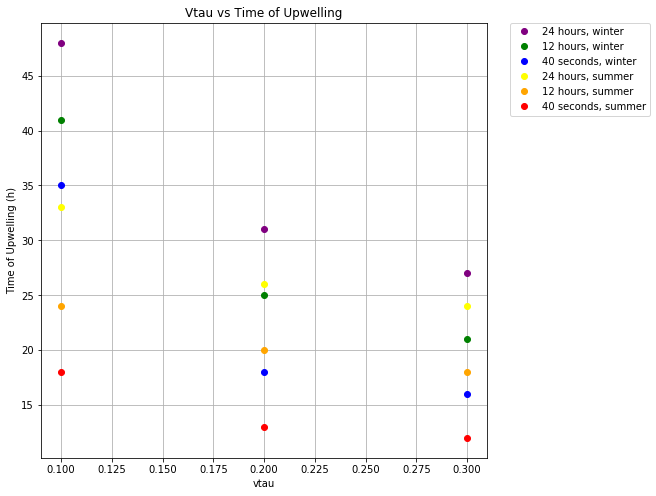

In [433]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_ylabel('Time of Upwelling (h)')
ax.set_xlabel('vtau')
ax.grid('on')
ax.plot(0.2,31,'o', color='purple' )
ax.plot(0.2,25,'o', color='green')
ax.plot(0.2,18,'o', color='blue')
ax.plot(0.1,48,'o', color='purple')
ax.plot(0.1,41,'o', color='green')
ax.plot(0.1,35,'o', color='blue')
ax.plot(0.3,27,'o', color='purple', label = '24 hours, winter')
ax.plot(0.3,21,'o', color='green', label = '12 hours, winter')
ax.plot(0.3,16,'o', color='blue', label = '40 seconds, winter')
ax.plot(0.2,26,'o', color='yellow' )
ax.plot(0.2,20,'o', color='orange')
ax.plot(0.2,13,'o', color='red')
ax.plot(0.1,33,'o', color='yellow', label = '24 hours, summer')
ax.plot(0.1,24,'o', color='orange', label = '12 hours, summer')
ax.plot(0.1,18,'o', color='red', label = '40 seconds, summer')
ax.plot(0.3,24,'o', color='yellow')
ax.plot(0.3,18,'o', color='orange')
ax.plot(0.3,12,'o', color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Vtau vs Time of Upwelling')

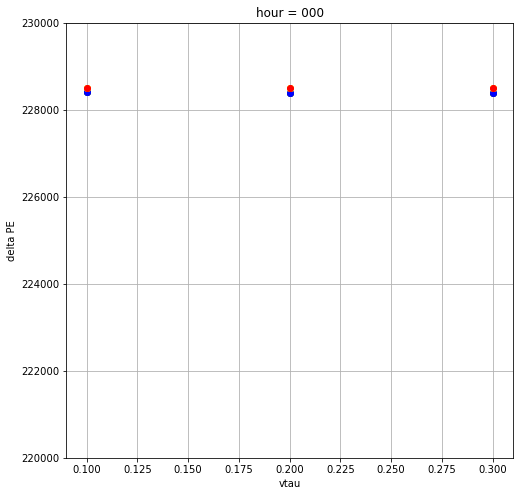

In [432]:
fig, ax = plt.subplots(figsize = (8,8))
def animate30(i):
    ax.clear()
    ax.plot(0.2,list_for_U24W[i],'o', color='purple' )
    ax.plot(0.2,list_for_U48W[i],'o', color='green')
    ax.plot(0.2,list_for_U72W[i],'o', color='blue')
    ax.plot(0.1,list_for_U24W1[i],'o', color='purple')
    ax.plot(0.1,list_for_U48W1[i],'o', color='green')
    ax.plot(0.1,list_for_U72W1[i],'o', color='blue')
    ax.plot(0.3,list_for_U24W3[i],'o', color='purple', label = '24 hours, winter')
    ax.plot(0.3,list_for_U48W3[i],'o', color='green', label = '12 hours, winter')
    ax.plot(0.3,list_for_U72W3[i],'o', color='blue', label = '40 seconds, winter')
    ax.plot(0.2,list_for_U24S[i],'o', color='yellow' )
    ax.plot(0.2,list_for_U48S[i],'o', color='orange')
    ax.plot(0.2,list_for_U72S[i],'o', color='red')
    ax.plot(0.1,list_for_U24S1[i],'o', color='yellow', label = '24 hours, summer')
    ax.plot(0.1,list_for_U48S1[i],'o', color='orange', label = '12 hours, summer')
    ax.plot(0.1,list_for_U72S1[i],'o', color='red', label = '40 seconds, summer')
    ax.plot(0.3,list_for_U24S3[i],'o', color='yellow')
    ax.plot(0.3,list_for_U48S3[i],'o', color='orange')
    ax.plot(0.3,list_for_U72S3[i],'o', color='red')
    ax.set_title('hour = %03d'%(i)) 
    ax.set_ylabel('delta PE')
    ax.set_xlabel('vtau')
    ax.grid('on')
    ax.set_ylim(220000, 230000)
    return ax
interval = 0.25#in seconds
ani40 = animation.FuncAnimation(fig,animate30,frames=102,interval=interval*1e+3, repeat=False)
ani40

In [436]:
nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/lake_bathy201702.nc').variables['Bathymetry'][200,136]

222.5